In [1]:
# !pip install imblearn

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

#colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list
q2_df = pd.read_csv("liedetector.csv")

In [4]:
q2_df

,X1,X2,X3,X4,X5,X6
0,P_001,3.62160,8.66610,-2.8073,-0.44699,0
1,P_002,4.54590,8.16740,-2.4586,-1.46210,0
2,P_003,3.86600,-2.63830,1.9242,0.10645,0
3,P_004,3.45660,9.52280,-4.0112,-3.59440,0
4,P_005,0.23230,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...,...
1367,P_1368,0.40614,1.34920,-1.4501,-0.55949,0
1368,P_1369,-1.38870,-4.87730,6.4774,0.34179,0
1369,P_1370,-3.75030,-13.45860,17.5932,-2.77710,0
1370,P_1371,-3.56370,-8.38270,12.3930,-1.28230,0


In [5]:
q2_df[~q2_df.applymap(np.isreal).all(1)]

,X1,X2,X3,X4,X5,X6
0,P_001,3.62160,8.66610,-2.8073,-0.44699,0
1,P_002,4.54590,8.16740,-2.4586,-1.46210,0
2,P_003,3.86600,-2.63830,1.9242,0.10645,0
3,P_004,3.45660,9.52280,-4.0112,-3.59440,0
4,P_005,0.23230,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...,...
1367,P_1368,0.40614,1.34920,-1.4501,-0.55949,0
1368,P_1369,-1.38870,-4.87730,6.4774,0.34179,0
1369,P_1370,-3.75030,-13.45860,17.5932,-2.77710,0
1370,P_1371,-3.56370,-8.38270,12.3930,-1.28230,0


In [6]:
q2_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X2,1372.0,0.433665,2.842766,-7.0421,-1.773000,0.49618,2.821475,6.8248
X3,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
X4,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
X5,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
X6,1372.0,0.406706,0.491398,0.0000,0.000000,0.00000,1.000000,1.0000


In [7]:
q2_df.groupby(["X6"]).count()

,X1,X2,X3,X4,X5
X6,,,,,
0,814,814,814,814,814
1,558,558,558,558,558


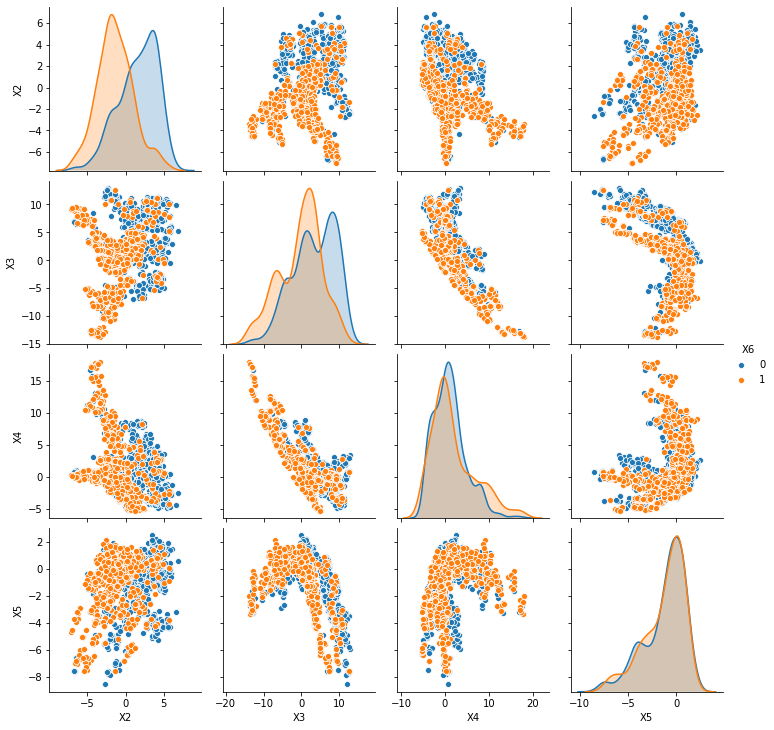

In [9]:
sns.pairplot(q2_df, hue='X6')

In [27]:
n = q2_df.drop('X1', axis=1)

In [37]:
n.head(5)

,X2,X3,X4,X5,X6
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0
3,3.4566,9.5228,-4.0112,-3.59440,0
4,0.2323,-4.4552,4.5718,-0.98880,0


In [86]:
array = q2_df.values
X = array[:,0:4]# select all rows and first 8 columns which are the attributes
Y = array[:,4]   #ect all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.03  #aking 70:30 training and test set
seed = 3
X_train, X_test, y_train, y_test # train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

numpy.ndarray

In [87]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8349514563106796
[[197  42]
 [ 26 147]]
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       239
         1.0       0.78      0.85      0.81       173

    accuracy                           0.83       412
   macro avg       0.83      0.84      0.83       412
weighted avg       0.84      0.83      0.84       412



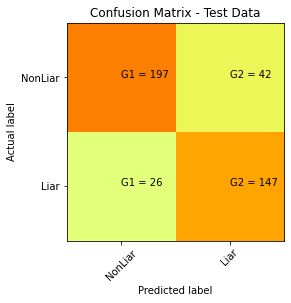

In [88]:
cm = metrics.confusion_matrix(y_test, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['NonLiar', 'Liar']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()